# COE Analysis

### Objectives:

1.  Find direct factors of COE pricing trends (premium & pqp)
2.  Find indirect factors of COE pricing trends

## Import Dependencies

In [112]:
# data manipulation dependencies
import numpy as np
import pandas as pd

# graphing dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Preparation

### Set Seaborn Generic Themes

In [113]:
sns.set_theme(rc={'figure.figsize': (10, 6)}, palette='Set1')

### Load Dataset (from PDAS)

In [161]:
df = pd.read_csv('./data/final.csv', index_col=0)
df.head(n=10)

(400, 12)

## Analysis

### Direct Factor 1:    Category

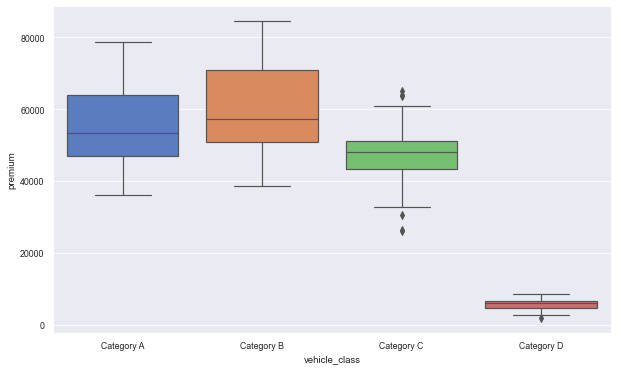

In [115]:
# COE by category
# COE is greatest for cars and cheapest for motorcycles (expected) (vehicle class)
with sns.axes_style(style='darkgrid'):
    with sns.plotting_context(context='paper'):
        with sns.color_palette(palette='muted'):
            ax = sns.boxplot(data=df, x='vehicle_class', y='premium')

Category is the most defining factor when it comes to COE pricing, <br />
with Categories A and B topping the charts.

From now on, Categories C and D will be excluded from the analyses.

To provide better context, these are the definitions of the above categories:

+   A)  Internal Combustion Engine (ICE) cars with an engine capacity of at most 1600cc and Electric cars with engine power of at most 97kW
+   B)  Internal Combustion Engine (ICE) cars with an engine capacity of at least 1600cc and Electric cars with engine power of at least 97kW
+   C)  Goods Vehicles (like trucks, lorries) and Buses
+   D)  Motorcycles

In [116]:
df = df[df['vehicle_class'].str.contains(r'Category (A|B)')]
df.reset_index(drop=True, inplace=True)
df.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,pqp,number_of_deregistered,number_of_registered,number,year
0,1,1,Category A,364,361,623,72369,76109,1011,844,341519,2014
1,1,2,Category A,368,364,724,72290,76109,1011,844,341519,2014
2,1,1,Category B,386,377,581,78700,82333,927,1224,279902,2014
3,1,2,Category B,393,388,512,79000,82333,927,1224,279902,2014
4,2,1,Category A,362,356,719,71564,73237,1104,754,341169,2014


### Direct Factor 2:    Year of Issuance

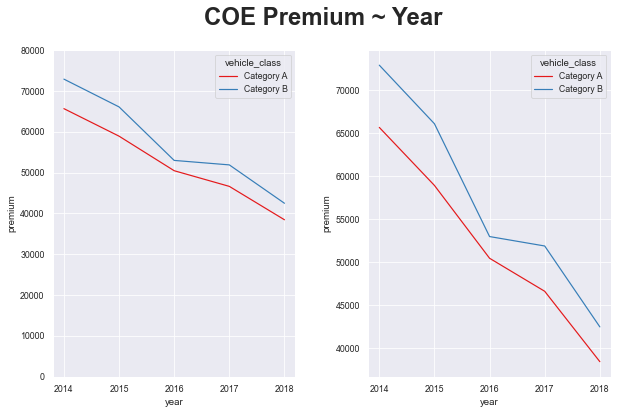

In [117]:
# COE trend
# COE prices have been on the decline (time)
# Of the 2 types of cars, cat b owners pay more
# sns.lineplot(data=df.groupby(by='year')['premium'].median())
with sns.axes_style(style='darkgrid'):
    with sns.plotting_context(context='paper'):
        # fig2 = plt.Figure(figsize=(10, 4))
        fig2, (ax2, ax3) = plt.subplots(nrows=1, ncols=2)
        fig2.suptitle('COE Premium ~ Year', fontproperties={'size': 24, 'weight': 'bold'})
        plt.subplots_adjust(wspace=0.3)
        # ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
        sns.lineplot(data=df[df['vehicle_class'].str.contains(r'Category (A|B)')].groupby(by=['year', 'vehicle_class']).median(), x='year', y='premium', hue='vehicle_class', ax=ax2)
        # ax3 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))
        sns.lineplot(data=df[df['vehicle_class'].str.contains(r'Category (A|B)')].groupby(by=['year', 'vehicle_class']).median(), x='year', y='premium', hue='vehicle_class', ax=ax3)
        axes2 = [ax2, ax3]
        for a in axes2:
            a.set_xticks([i for i in range(2014, 2019)])
        ax2.set_ylim(bottom=0, top=80000)

As time goes by, COE prices actually drop (quite consistently).



### Direct Factor 3:    Quota of COE Bids

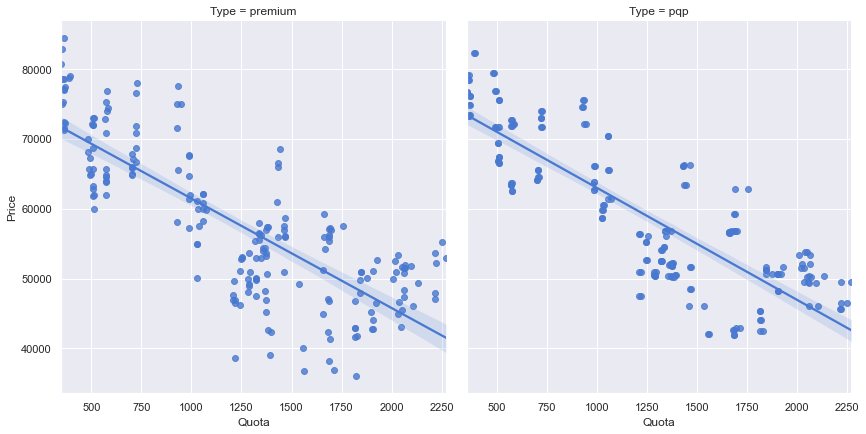

In [145]:
# COE by quota
# As expected, greater quota leads to lower price
with sns.color_palette('muted'):
    tmp = df.melt(id_vars='quota', value_vars=['premium', 'pqp'], var_name='Type', value_name='Price')
    g1 = sns.FacetGrid(tmp, col='Type', height=6, sharey=True)
    # ax = sns.regplot(data=tmp, x='quota', y='premium')
    g1.map_dataframe(sns.regplot, data=tmp, x='quota', y='Price')
    g1.set_xlabels('Quota')
    g1.set_ylabels('Price')

### Indirect Factor 1:  Car Population

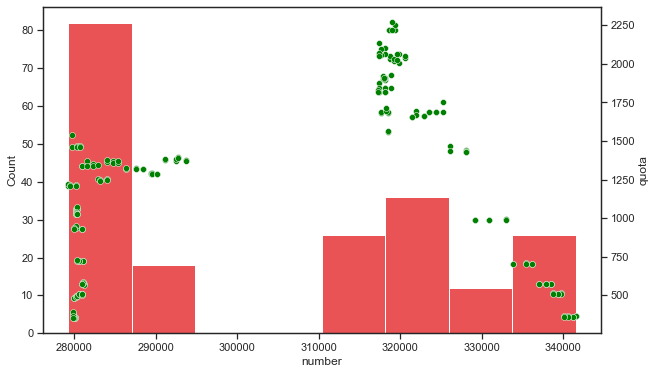

In [160]:
# Deregistered by pqp - for coe extensions
with sns.axes_style(style='ticks'):
    ax4 = sns.histplot(data=df, x='number', bins=6)
    ax5 = ax4.twinx()
    sns.scatterplot(data=df, x='number', y='quota', ax=ax5, color='green')

bidding_no  quota  bids_success  bids_received  premium      pqp  \
year month                                                                     
2014 1             1.5  366.0         362.5          673.5  72329.5  76109.0   
     2             1.5  362.0         357.0          709.5  74382.5  73237.0   
     3             1.5  363.5         358.0          596.0  77800.5  73431.0   
     4             1.5  364.0         358.5          525.0  74367.5  74838.0   
     5             1.5  511.0         509.0          836.5  62845.5  75517.0   

            number_of_deregistered  number_of_registered    number  
year month                                                          
2014 1                      1011.0                 844.0  341519.0  
     2                      1104.0                 754.0  341169.0  
     3                      1330.0                 806.0  340645.0  
     4                      1347.0                 768.0  340066.0  
     5                      1271.0                 905.0  339700.0

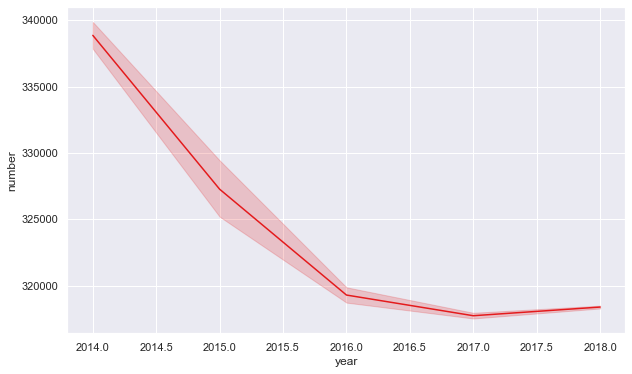

In [120]:
c = df[df['vehicle_class'].str.contains('Category A')].groupby(['year', 'month']).mean()
sns.lineplot(data=c, x='year', y='number')
c.head()

,month,bidding_no,quota,bids_success,bids_received,premium,pqp,number_of_deregistered,number_of_registered,number
year,,,,,,,,,,
2014,312,72,23435,23203,38905,3382965,3444512,66746,57230,14862938
2015,312,72,54445,54107,80370,3058854,3156016,143504,114904,14585446
2016,312,72,80095,79235,126244,2441014,2492714,176634,174604,14405114
2017,312,72,77150,76759,106582,2346981,2373730,161576,183550,14534544
2018,12,12,12067,12019,15704,324372,375882,23436,21556,2444034


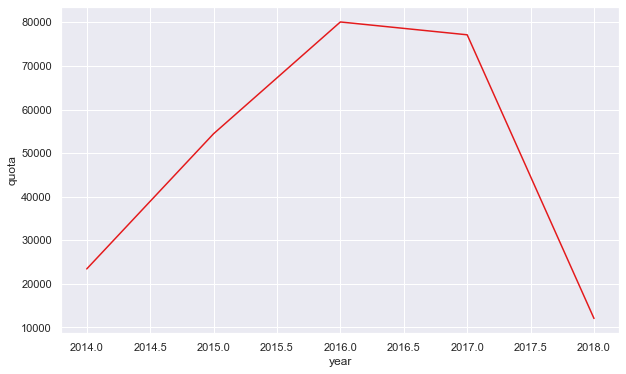

In [121]:
# Quota by year
sns.lineplot(data=df.groupby('year').sum(), x='year', y='quota')
df.groupby('year').sum().head()

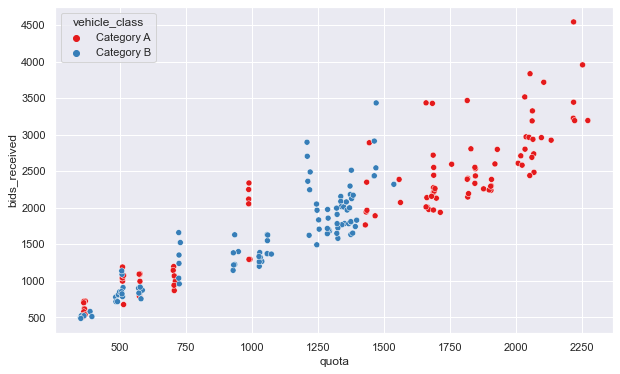

In [122]:
# Received by quota
sns.scatterplot(data=df, x='quota', y='bids_received', hue='vehicle_class')
px.scatter(data_frame=df, x='quota', y='bids_received', color='vehicle_class')

<AxesSubplot:xlabel='vehicle_class', ylabel='year'>

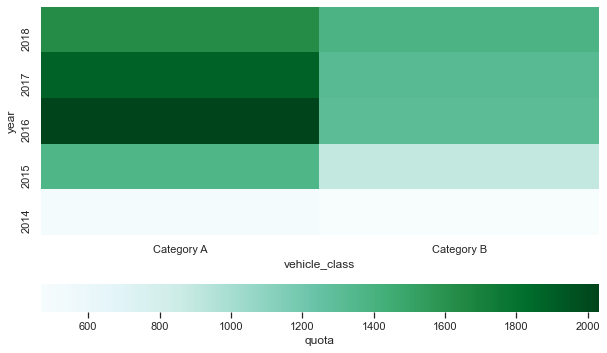

In [123]:
sns.heatmap(df.pivot_table(index='year', columns='vehicle_class', values='quota').sort_index(ascending=False), cmap='BuGn', cbar_kws={'orientation': 'horizontal', 'label': 'quota'})

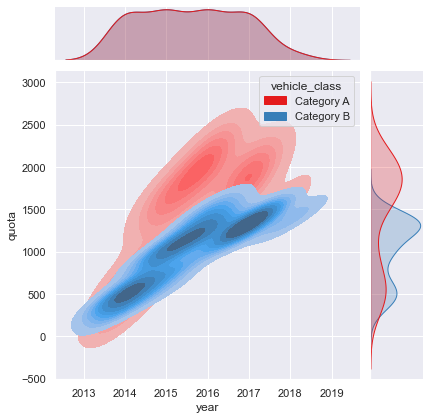

In [124]:
sns.jointplot(data=df, x='year', y='quota', hue='vehicle_class', kind='kde', fill=True)

In [125]:
px.bar(data_frame=df, x='year', y='bids_success', color='vehicle_class')

In [126]:
df.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,pqp,number_of_deregistered,number_of_registered,number,year
0,1,1,Category A,364,361,623,72369,76109,1011,844,341519,2014
1,1,2,Category A,368,364,724,72290,76109,1011,844,341519,2014
2,1,1,Category B,386,377,581,78700,82333,927,1224,279902,2014
3,1,2,Category B,393,388,512,79000,82333,927,1224,279902,2014
4,2,1,Category A,362,356,719,71564,73237,1104,754,341169,2014


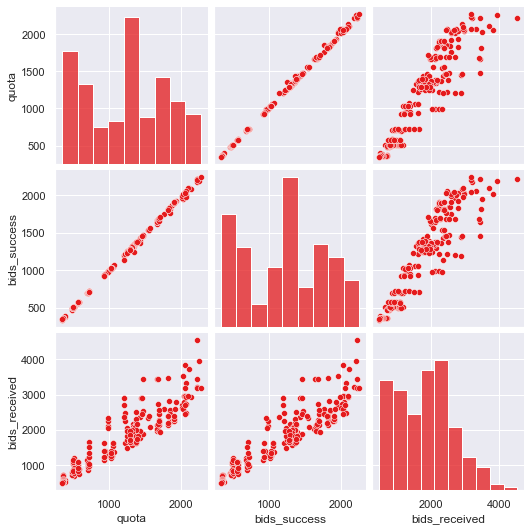

In [127]:
sns.pairplot(data=df[['quota', 'bids_success', 'bids_received']])

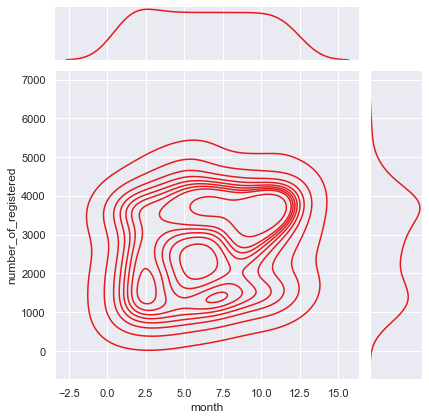

In [128]:
sns.jointplot(data=df, x='month', y='number_of_registered', kind='kde')

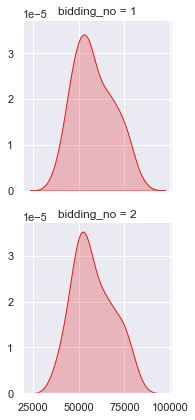

In [129]:
a = sns.FacetGrid(data=df, row='bidding_no')
a.map_dataframe(sns.kdeplot, x='premium', fill=True)

In [130]:
px.scatter(data_frame=df, x='month', y='premium', color='vehicle_class', size='quota', animation_frame='year', animation_group='vehicle_class')